In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# For offline use
cf.go_offline()

In [2]:
"""
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)
"""

'\nlat : String variable, Latitude\nlng: String variable, Longitude\ndesc: String variable, Description of the Emergency Call\nzip: String variable, Zipcode\ntitle: String variable, Title\ntimeStamp: String variable, YYYY-MM-DD HH:MM:SS\ntwp: String variable, Township\naddr: String variable, Address\ne: String variable, Dummy variable (always 1)\n'

In [3]:
#Read in 911 Calls Kaggle Data
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
#Take Type Reason out of Title Column
df['Type'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'] = df['title'].apply(lambda reason: reason.split(':')[1])


#Convert timeStamp data from str to Datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
#Divide timeStamp into Month, Day of Week, Hour, Year, Date
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Date']=df['timeStamp'].apply(lambda t: t.date())
#convert Day of Week to Str
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)




In [5]:
#Top 5 Zip Codes
df['zip'].value_counts().head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

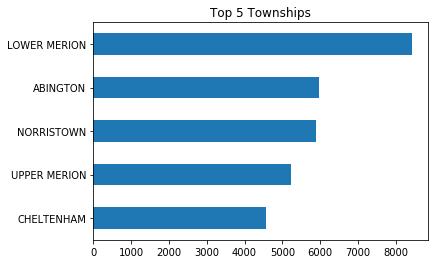

In [6]:
#Top 5 TownShips
top_towns = df['twp'].value_counts().head(5)
top_towns = top_towns.iloc[::-1]
top_towns.plot.barh(title = 'Top 5 Townships')


(-1.1093096237239193,
 1.1004433154154247,
 -1.1110170975602602,
 1.107614108473432)

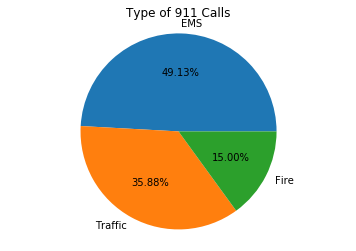

In [7]:
#Type Breakdown  
df['Type'].value_counts()
#Pie Chart of Type of 911 Calls
plt.pie(x=df['Type'].value_counts(),data = df,labels=['EMS','Traffic','Fire'], autopct = '%0.2f%%')
plt.title('Type of 911 Calls')
plt.axis('equal')

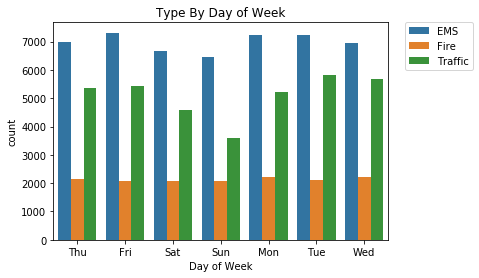

In [8]:
#Plot Type by day of week
sns.countplot(x='Day of Week',data=df,hue='Type')
plt.title('Type By Day of Week')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [9]:
#Plot Calls over Time
df.groupby('Date').count()['twp'].iplot(title = 'Total Calls Over Time')

In [108]:
#Top 5 Dates 

tot_calls_by_day = df.groupby('Date').count()['twp'].reset_index()
tot_calls_by_day.rename(index=str, columns={'twp': "Count"}, inplace = True)
tot_calls_by_day=tot_calls_by_day.sort_values(by = 'Count',ascending = False).head(5)
tot_calls_by_day

,Date,Count
44,2016-01-23,913
76,2016-02-24,678
45,2016-01-24,662
33,2016-01-12,588
115,2016-04-03,586


In [10]:
df[df['Type']=='Fire'].groupby('Date').count()['twp'].iplot(title = 'Fire Calls Over Time',colorscale='set1')


In [107]:
#Top 5 Dates for Fires

fire_by_day = df[df['Type']=='Fire'].groupby('Date').count()['twp'].reset_index()
fire_by_day.rename(index=str, columns={'twp': "Count"}, inplace = True)
fire_by_day=fire_by_day.sort_values(by = 'Count',ascending = False).head(5)
fire_by_day

,Date,Count
76,2016-02-24,172
45,2016-01-24,161
44,2016-01-23,159
228,2016-07-25,159
115,2016-04-03,147


In [11]:
df[df['Type']=='Traffic'].groupby('Date').count()['twp'].iplot(title = 'Traffic Calls Over Time',colorscale='set2')

In [106]:
#Top 5 Dates for Traffic

traf_by_day = df[df['Type']=='Traffic'].groupby('Date').count()['twp'].reset_index()
traf_by_day.rename(index=str, columns={'twp': "Count"}, inplace = True)
traf_by_day=traf_by_day.sort_values(by = 'Count',ascending = False).head(5)
traf_by_day

,Date,Count
44,2016-01-23,557
33,2016-01-12,324
76,2016-02-24,309
115,2016-04-03,281
13,2015-12-23,277


In [101]:
df[df['Type']=='EMS'].groupby('Date').count()['twp'].iplot(title = 'EMS Calls Over Time',colorscale='rdgy')

In [105]:
#Top 5 Dates for Traffic

ems_by_day = df[df['Type']=='EMS'].groupby('Date').count()['twp'].reset_index()
ems_by_day.rename(index=str, columns={'twp': "Count"}, inplace = True)
ems_by_day = ems_by_day.sort_values(by = 'Count',ascending = False).head(5)
ems_by_day

#########BREAKDOWN BY TYPE BY DATE

,Date,Count
45,2016-01-24,250
36,2016-01-15,239
54,2016-02-02,232
113,2016-04-01,231
62,2016-02-10,228


In [13]:
#Find out the dates for lowest and highest calls

max_calls = df.groupby('Date').count()['twp'].max()
print('The highest number of calls on a day was: ' + str(max_calls))
min_calls = df.groupby('Date').count()['twp'].min()
print('The lowest number of calls on a day was: ' + str(min_calls))
avg_calls = df.groupby('Date').count()['twp'].mean()
print('The average of calls on a day was: ' + str(round(avg_calls)))

The highest number of calls on a day was: 913
The lowest number of calls on a day was: 115
The average of calls on a day was: 384


In [14]:
print('There are {} different townships'.format(df['twp'].nunique()))
print('There are {} different Reasons'.format(df['Reason'].nunique()))

There are 68 different townships
There are 81 different Reasons


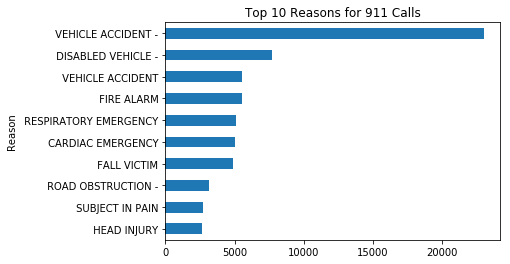

In [15]:
top_reasons = df.groupby('Reason').count().sort_values(by = 'twp',ascending=False)['twp'].head(10)
top_reasons = top_reasons.iloc[::-1]
top_reasons.plot(kind='barh',stacked = True, title = 'Top 10 Reasons for 911 Calls')



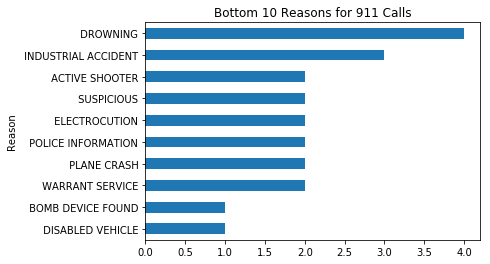

In [16]:
bot_reasons = df.groupby('Reason').count().sort_values(by = 'twp',ascending=True)['twp'].head(10)
bot_reasons.plot(kind='barh',stacked = True, title = 'Bottom 10 Reasons for 911 Calls')

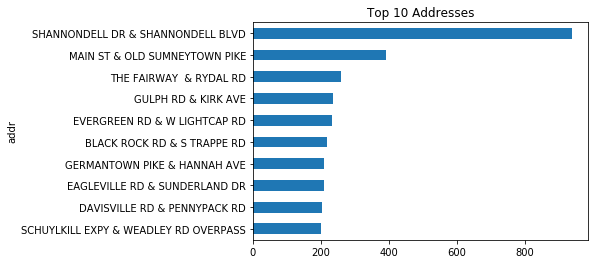

In [17]:
top_addr = df.groupby('addr').count().sort_values(by = 'twp',ascending=False)['twp'].head(10)
top_addr = top_addr.iloc[::-1]
top_addr.plot(kind='barh',stacked = True,title = 'Top 10 Addresses')

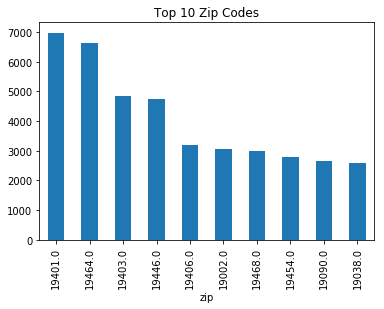

In [18]:
top_zip = df.groupby('zip').count().sort_values(by = 'twp',ascending=False)['twp'].head(10)
#top_zip = top_addr.iloc[::-1]
top_zip.plot(kind='bar',stacked = True,title = 'Top 10 Zip Codes')

Text(0.5, 1.0, 'Heat Map of Calls By Hour By Day of Week')

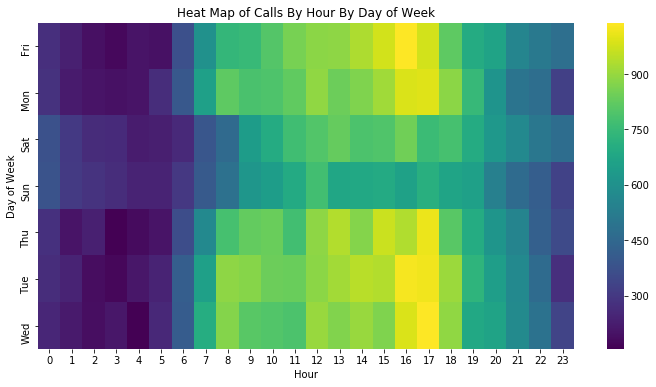

In [19]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis',)
plt.title('Heat Map of Calls By Hour By Day of Week')